In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import drone
from matplotlib import pyplot as plt

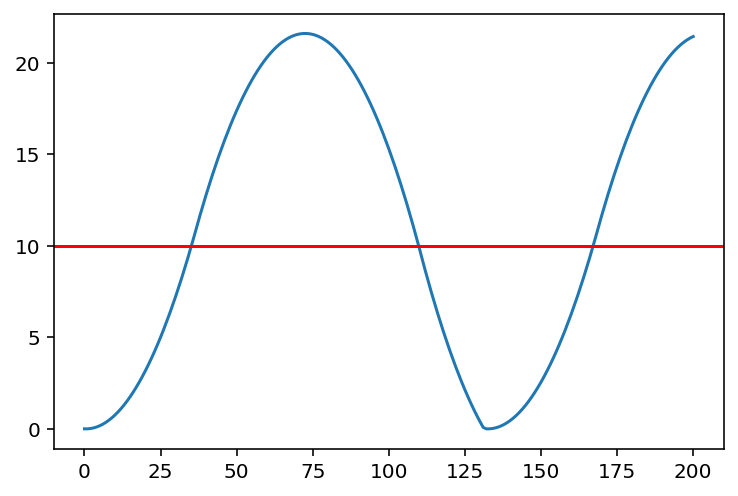

In [16]:
env = drone.DroneEnv(gravity=0)
observations = []
actions = []
obs = env.reset()  
for _ in range(200):
    observations.append(obs)
    error = env.goal - obs # how far you are from the goal
    action = 1 if error > 0 else - 1# your desired action positive try to go up negative try to go down
    actions.append(action)
    env.render()
    obs, _, _, _ = env.step(action)
observations.append(obs)
env.close()
plt.plot(observations)
plt.axhline(env.goal, color='red')

Episode finished after 19 timesteps


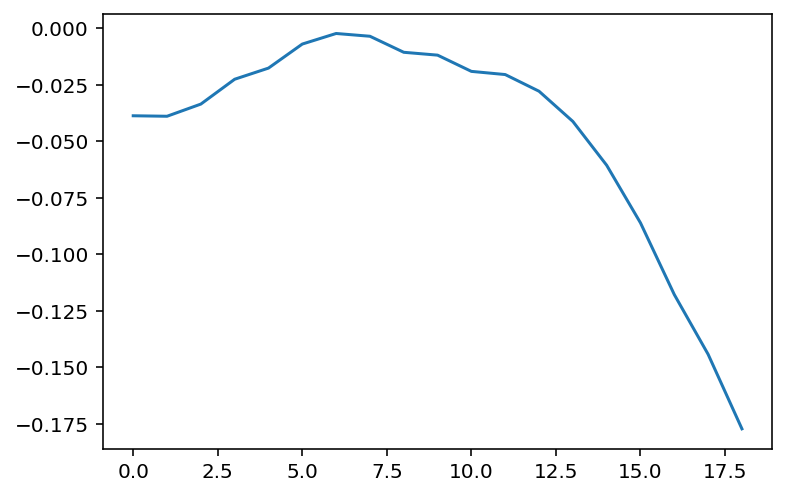

In [22]:
import gym
env = gym.make('CartPole-v0').env
observation = env.reset()
angles = []
observations = [observation]
last_error = None
integral = 0
for t in range(500):
    env.render()
    action = env.action_space.sample()
    #print(observation)
    angle = observation[2]
    error = angle - 0.02
    integral += error
    diff = 0 if last_error is None else error - last_error
    action = env.action_space.sample()
    angles.append(angle)
    last_error = error
    #print(angle)
    observation, reward, done, info = env.step(action)
    
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()
plt.plot(angles)